# Reproducibility 3: figure 4
- Comparison between different models 
- See folder: models_comp for detailed calculation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/home/swang/miniconda3/envs/drug/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/swang/miniconda3/envs/drug/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/swang/miniconda3/envs/drug/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/swang/miniconda3/envs/drug/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

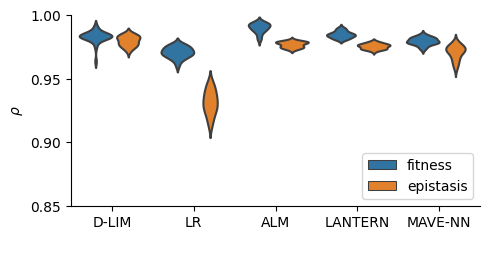

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
import sys 
sys.path.append('../src/')
sys.path.append('../')
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from numpy import mean, logspace, std
from numpy.random import choice, seed
import matplotlib.pyplot as plt
from multiprocessing import Pool
from dlim.utils import Data_model
import joblib
import numpy as np 
import pandas as pd 
fig, ax = plt.subplots(1, figsize = (5, 2.5))
df_data = pd.read_csv("../data/data_env_1.csv", sep = ',', header = None)


data = Data_model(data=df_data, n_variables=2)
color1 = '#e78ac3'  # pink
color2 = '#ffa500'  # modern orange
color3 = '#607d8b'  # light gray-blue
color4 = '#8da0cb' # 
colors = [color1, color2, color3, color4]

colors += ['#41afaa', 'k']
all_result = {}
data_dict = {
    'model': [],
    'acc': [],
    'data_name': []
    }
for id_data, data_name in enumerate(['fitness', 'epistasis']):
    if data_name == 'fitness':
        plot_f = 'left'
        
    else:
        plot_f = 'right'
#   'LANTERN'
    for id, model in enumerate(['D-LIM', 'LR', 'ALM',  'LANTERN', 'MAVE-NN']):

        if model != 'D-LIM':
            result_nn_reg = joblib.load('../models_comp/results/harry_' + str(data_name) + '/reg_' + str(model) + '_frac_1.0.joblib')
        else:
            result_nn_reg = joblib.load('./results/harry_' + str(data_name) + '/reg_' + str(model) + '_frac_1.0.joblib')
     
        

        res_w = result_nn_reg[1.0]
        data_dict['acc'] += res_w 
        if model == 'dlim':
            model = 'D-LIM'
        data_dict['model'] += [str(model) for el in res_w]
        data_dict['data_name'] += [str(data_name) for el in res_w]
      
    

lgd = fig.legend(frameon=False, ncol = 5, loc='lower center',bbox_to_anchor=(0.5, -0.05, 0, 0),)
df = pd.DataFrame.from_dict(data_dict)
# axe = sns.boxplot(data=df, x="model", y="acc", hue="data_name",  palette=["C0", "C1"], ax=ax['bottom'])
axe = sns.violinplot(data=df, x="model", y="acc", hue="data_name",  palette=["C0", "C1"], ax=ax, inner=None)

axe.legend(loc = 'lower right')
# axe.set_title('Cross validation ')
# Remove the top and right spines
axe.spines["top"].set_visible(False)
axe.spines["right"].set_visible(False)
# statistical annotation
axe.set_ylim([0.85, 1.0])
axe.set_xlabel(None, fontsize = 10)
axe.set_ylabel(f"$\\rho$", fontsize = 10)
fig.tight_layout()
fig.savefig('S5b_model_comp.svg', dpi = 300, transparent = True, bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig('S5b_model_comp.png', dpi = 300, transparent = True, bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.show()


In [24]:
df_stast = df.groupby(['model', 'data_name'])['acc'].agg(['mean', 'std', 'median']).set_axis(['mean', 'std', 'median'], axis=1).reset_index()
df_stast.to_csv('results_modle_comp.csv', index = None)

In [25]:
df_stast

,model,data_name,mean,std,median
0,ALM,epistasis,0.976804,0.002238,0.977143
1,ALM,fitness,0.989807,0.003854,0.990763
2,D-LIM,epistasis,0.979625,0.004014,0.980168
3,D-LIM,fitness,0.982860,0.004803,0.983347
4,LANTERN,epistasis,0.975455,0.002067,0.975712
5,LANTERN,fitness,0.984628,0.002625,0.984317
6,LR,epistasis,0.931366,0.009481,0.930844
7,LR,fitness,0.970674,0.004354,0.970719
8,MAVE-NN,epistasis,0.970627,0.005645,0.972682
9,MAVE-NN,fitness,0.979475,0.002903,0.979280
